# CLIMATE CHANGE AND ITS EFFECT ON CROP YIELD IN DEVELOPING COUNTRIES

Global warming has become one of the most environmental issues discussed. This is due to the impacts climate has on crop yields, weather patterns, sea levels, wildfire incidents and ecological systems
With the world population excepted to hit a double by 2050, global food production would have to double to meet the need of rising population (4).  The threat to food security from climate change is a critical issues for a number of businesses like food and beverages, retails, agriculture, insurance, biofuels, transportation and so on.  Developing countries may be more at risk of this food scarcity.

Knowing that developing regions are more vulnerable to the risks that climate change pose, it would be useful to narrow our scope and varities of crop commonly produced in those area.The countries include the  four countries represented in the Womentechsters fellowship,which are Ghana,Nigeria,Kenya, and SouthAfrica.

The crops include the following:
    
1.Rice

2.Maize

3.Cotton

4.Sugarcane

5.Millet

The data was collected and analysed from the year 2010 to 2018



**IMPORTING LIBRARIES**

In [10]:
import  warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from sklearn.decomposition import PCA


# IMPORTING CSV FILES
Three datasets were used, the first dataset contained the attainable and the yieldgap of some crops around the 4 countries of interest from 2010 till 2018. The second dateset is for the temperature of the countries under consideration form 2010 till 2018 and the third one is for the amount of rainfall in those countries from 2010 till 2018

In [11]:
crop_yield= pd.read_csv('Yield_gap_2010-2018.csv',skipinitialspace=True)
tempCountry=pd.read_csv('Temperature_for_4_countries.csv',skipinitialspace=True)
rainCountry= pd.read_csv('rainfall_for_d_four_countries.csv',skipinitialspace=True)
crop_yield.head()



,Entity,Year,rice_yield_gap,maize_yield_gap,cotton_yield_gap,sugarcane_yield_gap,millet_yield_gap
0,Ghana,2010,1.95,1.88,0.00,65.70,0.00
1,Ghana,2011,2.31,2.12,0.54,65.70,0.15
2,Ghana,2012,2.12,1.90,0.45,66.47,0.14
3,Ghana,2013,2.02,2.05,0.51,66.14,0.21
4,Ghana,2014,1.96,2.04,0.51,66.31,0.22


# **Cleaning the Data**

Majority of the datasets have been cleaned from the csv file. Checking the output of the datasets imported using the head() shows us that columm that has the countries is labelled Entity

In [12]:
tempCountry = tempCountry.rename(columns={'Entity' : 'Country'})
crop_yield = crop_yield.rename(columns={'Entity' : 'Country'})
rainCountry = rainCountry.rename(columns={'Countries':'Country'})
tempCountry.head()

,Country,Year,Average_temperature
0,Ghana,2010,28.09
1,Ghana,2011,27.78
2,Ghana,2012,27.56
3,Ghana,2013,27.72
4,Ghana,2014,27.85


Normalizing the data to look and read the same way across all records


In [13]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
       max_value = df[feature_name].max()
       min_value = df[feature_name].min()
       result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

Joining all the tables together to one table

In [14]:
croptemp_join=crop_yield.join(tempCountry,lsuffix="_left", rsuffix="_right")
croptemp_rain=croptemp_join.join(rainCountry,lsuffix="_left", rsuffix="_right")
croptemp_rain=croptemp_rain.drop(columns=['Country', 'Year','Country_right','Year_right'])
croptemp_rain = croptemp_rain.rename(columns={'Country_left' : 'Country'})
croptemp_rain = croptemp_rain.rename(columns={'Year_left' : 'Year'})
croptemp_rain.head()

,Country,Year,rice_yield_gap,maize_yield_gap,cotton_yield_gap,sugarcane_yield_gap,millet_yield_gap,Average_temperature,Rainfall
0,Ghana,2010,1.95,1.88,0.00,65.70,0.00,28.09,107.29
1,Ghana,2011,2.31,2.12,0.54,65.70,0.15,27.78,96.74
2,Ghana,2012,2.12,1.90,0.45,66.47,0.14,27.56,100.73
3,Ghana,2013,2.02,2.05,0.51,66.14,0.21,27.72,96.02
4,Ghana,2014,1.96,2.04,0.51,66.31,0.22,27.85,100.19


Removing the country, year, avaerage temperature and the rainfall column from the croptemp_rain. Naming the result table columns_crop

In [19]:
columns_crops=croptemp_rain.drop(columns=['Country', 'Year','Average_temperature','Rainfall'])


Transforming the resulting table into an array

In [22]:
x = columns_crops
x = StandardScaler().fit_transform(columns_crops) # normalizing the features


Converting the array into a table 

In [24]:
header = columns_crops.columns[0:]
normalised_crops = pd.DataFrame(x,columns=header)


In [26]:
pca_cropYield = PCA(n_components=1)
principalComponents_crops = pca_cropYield .fit_transform(normalised_crops)
principalComponents_crops_Df = pd.DataFrame(data = principalComponents_crops
             , columns = ['principal component crops'])
print('Explained variation per principal component: {}'.format(pca_cropYield.explained_variance_ratio_))

Explained variation per principal component: [0.61002597]


Taking the remaining colums and assigning it to column_unchanged

In [27]:
column_normalized = normalize(columns_crops)
column_unchanged=croptemp_rain.drop(columns=['rice_yield_gap','maize_yield_gap','cotton_yield_gap','sugarcane_yield_gap','millet_yield_gap'])       
crop_yieldTempRain=column_unchanged.join(column_normalized )
crop_yieldTempRainPca= crop_yieldTempRain.join(principalComponents_crops_Df)

Creating constants for Visualization

In [11]:
#let's create constants for our plot
year='Year'
crops ='principal component crops'
rainfall='Rainfall'
temperature ='Average_temperature'
country = 'Country'
rice='rice_yield_gap'
cotton='cotton_yield_gap'
millet='millet_yield_gap'
maize ='maize_yield_gap'
sugarcane ='sugarcane_yield_gap'

In [12]:
#let's create constants for our plot
year='Year'
crops ='principal component crops'
rainfall='Rainfall'
temperature ='Average_temperature'
country = 'Country'
rice='rice_yield_gap'
cotton='cotton_yield_gap'
millet='millet_yield_gap'
maize ='maize_yield_gap'
sugarcane ='sugarcane_yield_gap'

# Annual Crop Yield Gap
Crop yield gap is the difference between yield potential and average farmers yield over a specified area or period of time i.e the higher the the yield gap the lower the production.Factors that affect crop yield gap include flood,drought caused by climatic changes.Yield gap can also vary according to crop and annual temeprature of different locations and regions

Visualising the Annual crop yield gap of rice,maize,cotton,sugarcane and millet among the 4 countries

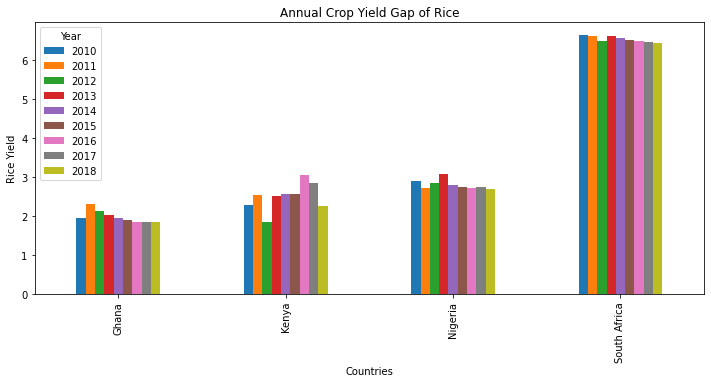

In [13]:
crop_yield.pivot(index='Country',columns='Year',values='rice_yield_gap').plot(kind='bar',figsize=(12,5))
plt.xlabel('Countries')
plt.ylabel('Rice Yield')
plt.title('Annual Crop Yield Gap of Rice')
plt.show()

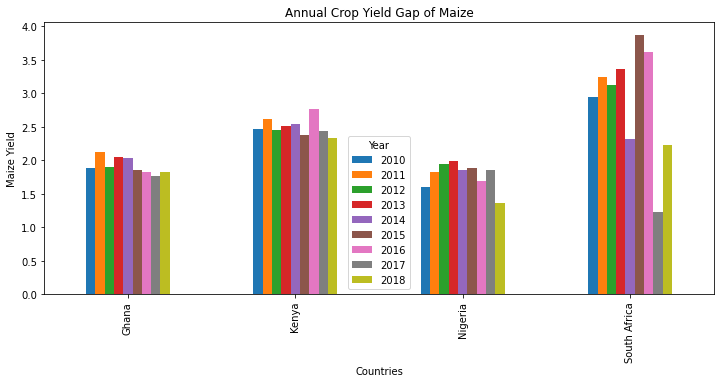

In [14]:
crop_yield.pivot(index='Country',columns='Year',values='maize_yield_gap').plot(kind='bar',figsize=(12,5))
plt.xlabel('Countries')
plt.ylabel('Maize Yield')
plt.title('Annual Crop Yield Gap of Maize')
plt.show()

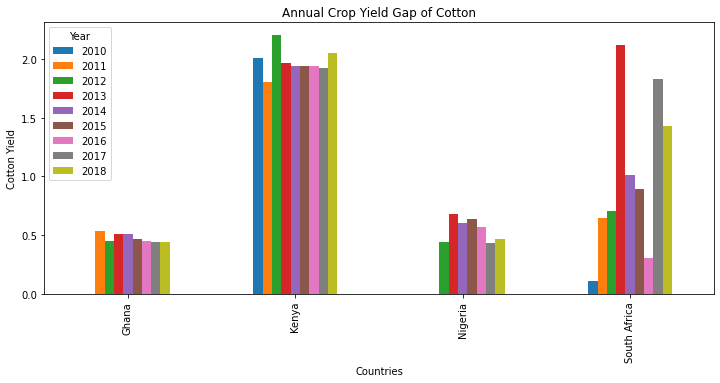

In [15]:
crop_yield.pivot(index='Country',columns='Year',values='cotton_yield_gap').plot(kind='bar',figsize=(12,5))
plt.xlabel('Countries')
plt.ylabel('Cotton Yield')
plt.title('Annual Crop Yield Gap of Cotton')
plt.show()

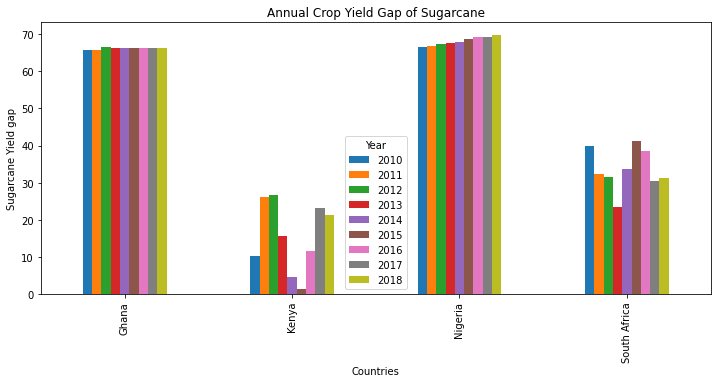

In [16]:
crop_yield.pivot(index='Country',columns='Year',values='sugarcane_yield_gap').plot(kind='bar',figsize=(12,5))
plt.xlabel('Countries')
plt.ylabel('Sugarcane Yield gap')
plt.title('Annual Crop Yield Gap of Sugarcane')
plt.show()

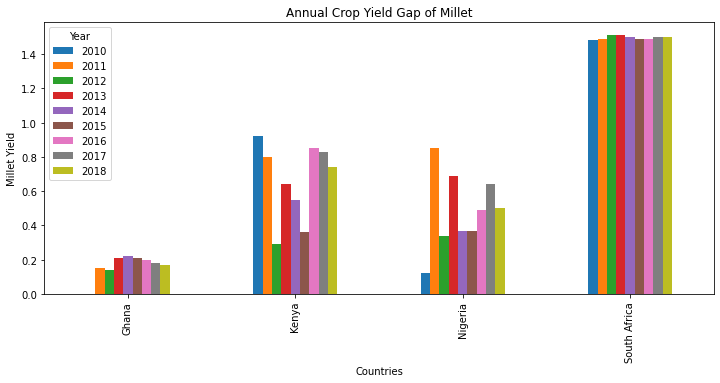

In [17]:
crop_yield.pivot(index='Country',columns='Year',values='millet_yield_gap').plot(kind='bar',figsize=(12,5))
plt.xlabel('Countries')
plt.ylabel('Millet Yield')
plt.title('Annual Crop Yield Gap of Millet')
plt.show()

# AVERAGE TEMPERATURE

Visualizing temperature of the countries across the years (2010-2018)

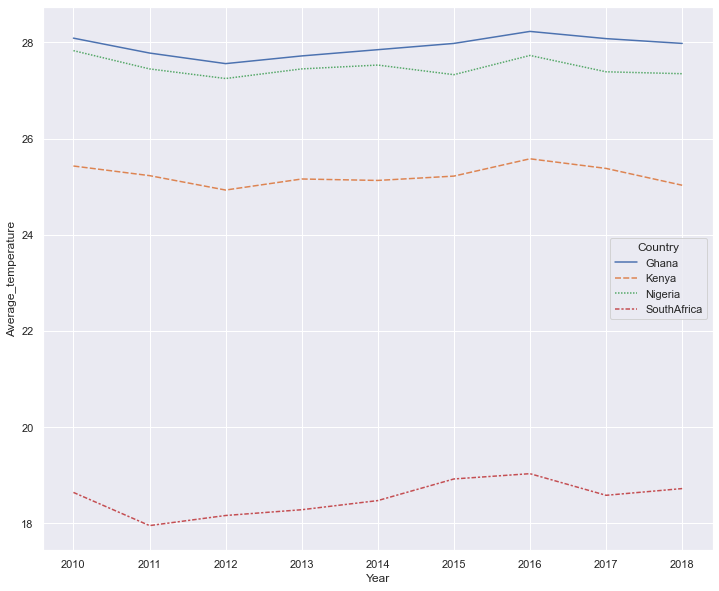

In [18]:
sns.set(rc={'figure.figsize':(12,10)})

tempCountry = sns.lineplot(x='Year', y='Average_temperature', hue = 'Country', style = 'Country', data =tempCountry, ci=None)

In [19]:
croptemp_rain.head()


,Country,Year,rice_yield_gap,maize_yield_gap,cotton_yield_gap,sugarcane_yield_gap,millet_yield_gap,Average_temperature,Rainfall
0,Ghana,2010,1.95,1.88,0.00,65.70,0.00,28.09,107.29
1,Ghana,2011,2.31,2.12,0.54,65.70,0.15,27.78,96.74
2,Ghana,2012,2.12,1.90,0.45,66.47,0.14,27.56,100.73
3,Ghana,2013,2.02,2.05,0.51,66.14,0.21,27.72,96.02
4,Ghana,2014,1.96,2.04,0.51,66.31,0.22,27.85,100.19


In [20]:
croptemp_rain.head(15)

,Country,Year,rice_yield_gap,maize_yield_gap,cotton_yield_gap,sugarcane_yield_gap,millet_yield_gap,Average_temperature,Rainfall
0,Ghana,2010,1.95,1.88,0.00,65.70,0.00,28.09,107.29
1,Ghana,2011,2.31,2.12,0.54,65.70,0.15,27.78,96.74
2,Ghana,2012,2.12,1.90,0.45,66.47,0.14,27.56,100.73
3,Ghana,2013,2.02,2.05,0.51,66.14,0.21,27.72,96.02
4,Ghana,2014,1.96,2.04,0.51,66.31,0.22,27.85,100.19
5,Ghana,2015,1.91,1.85,0.47,66.33,0.21,27.98,88.60
6,Ghana,2016,1.84,1.82,0.45,66.31,0.20,28.23,96.58
7,Ghana,2017,1.86,1.76,0.44,66.30,0.18,28.08,91.44
8,Ghana,2018,1.84,1.82,0.44,66.33,0.17,27.98,105.70
9,Kenya,2010,2.28,2.47,2.01,10.31,0.92,25.43,54.21


# ANNUAL MEAN TEMPERATURE AND CROP YIELD  

VISUALISING THE RELATIONSHIP BETWEEN ANNUAL MEAN TEMPERATURE AND CROP YIELD

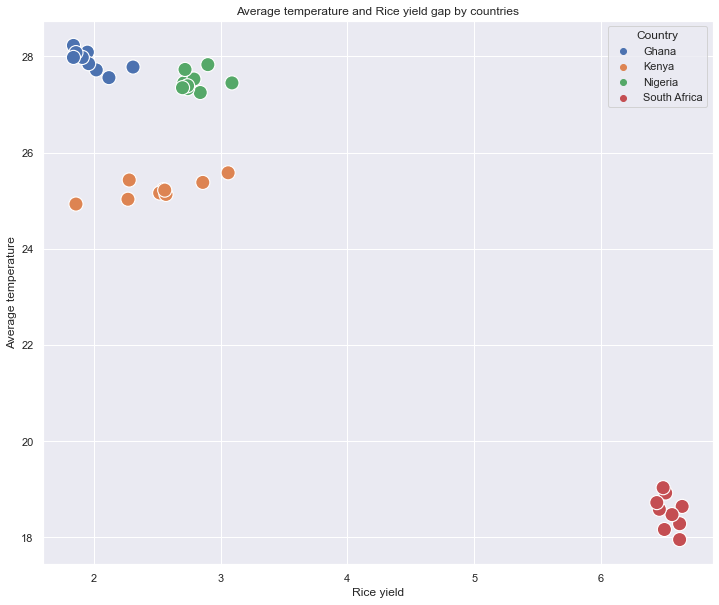

In [21]:
sns.scatterplot(x="rice_yield_gap", y="Average_temperature", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Rice yield')
plt.ylabel ('Average temperature')
plt.title('Average temperature and Rice yield gap by countries')
plt.show()


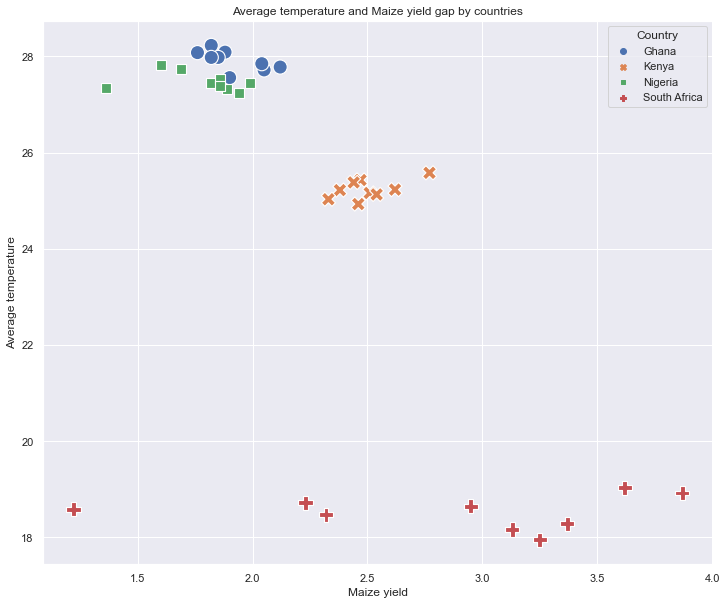

In [22]:
sns.scatterplot(x="maize_yield_gap", y="Average_temperature", hue="Country", data=croptemp_rain,s=200,style ="Country")
plt.xlabel('Maize yield')
plt.ylabel ('Average temperature')
plt.title('Average temperature and Maize yield gap by countries')
plt.show()


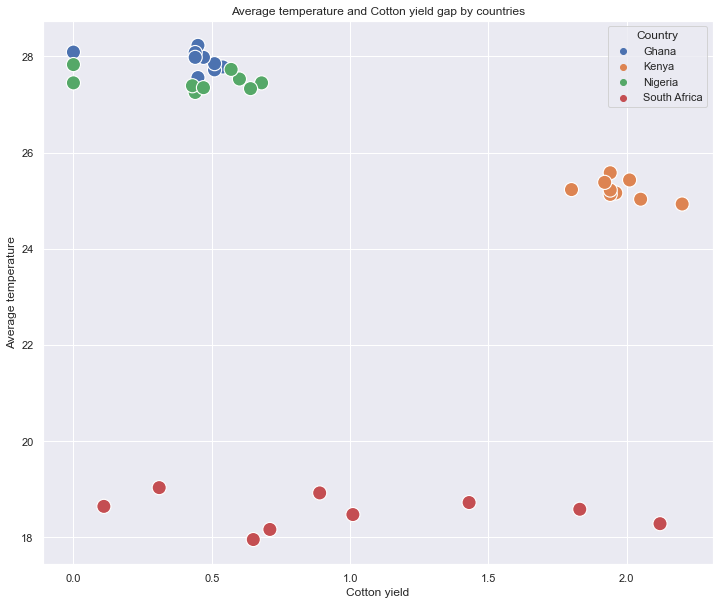

In [23]:
sns.scatterplot(x="cotton_yield_gap", y="Average_temperature", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Cotton yield')
plt.ylabel ('Average temperature')
plt.title('Average temperature and Cotton yield gap by countries')
plt.show()



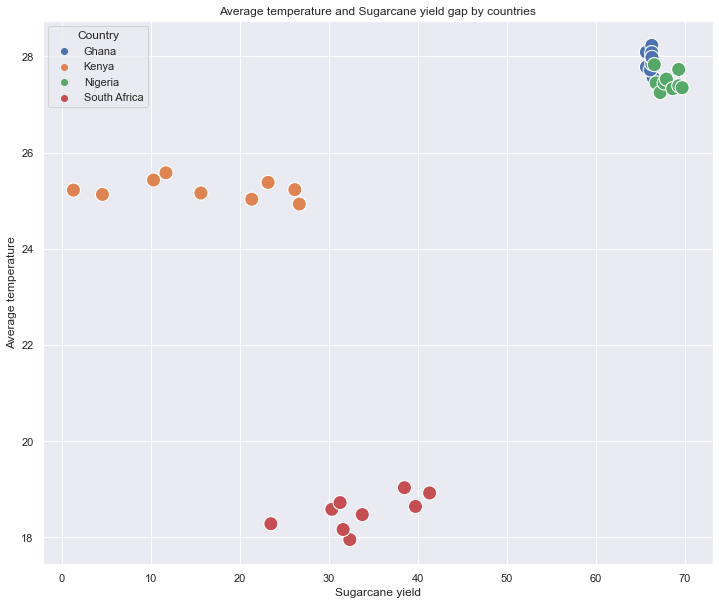

In [24]:
sns.scatterplot(x="sugarcane_yield_gap", y="Average_temperature", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Sugarcane yield')
plt.ylabel ('Average temperature')
plt.title('Average temperature and Sugarcane yield gap by countries')
plt.show()


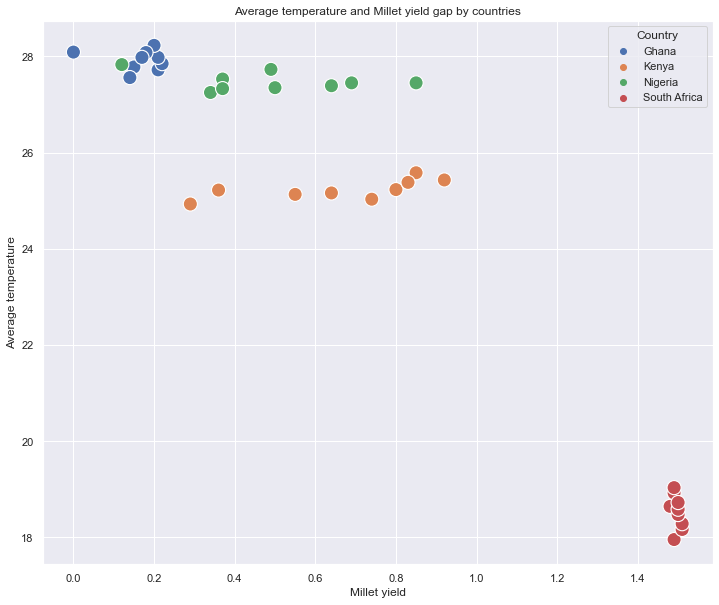

In [25]:
sns.scatterplot(x="millet_yield_gap", y="Average_temperature", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Millet yield')
plt.ylabel ('Average temperature')
plt.title('Average temperature and Millet yield gap by countries')
plt.show()



# ANNUAL RAINFALL AND CROP YIELD

VISUALISING THE RELATIONSHIP BETWEEN RAINFALL AND CROP YIELD

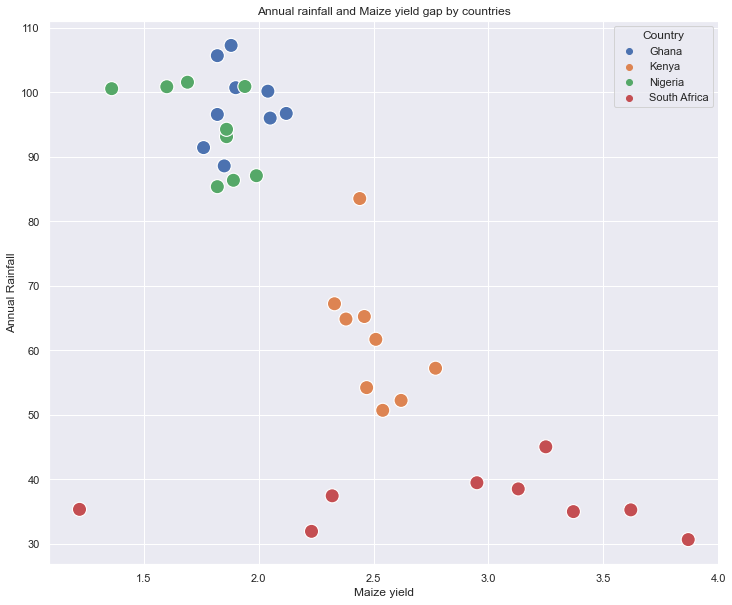

In [26]:
sns.scatterplot(x="maize_yield_gap", y="Rainfall", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Maize yield')
plt.ylabel ('Annual Rainfall')
plt.title('Annual rainfall and Maize yield gap by countries')
plt.show()



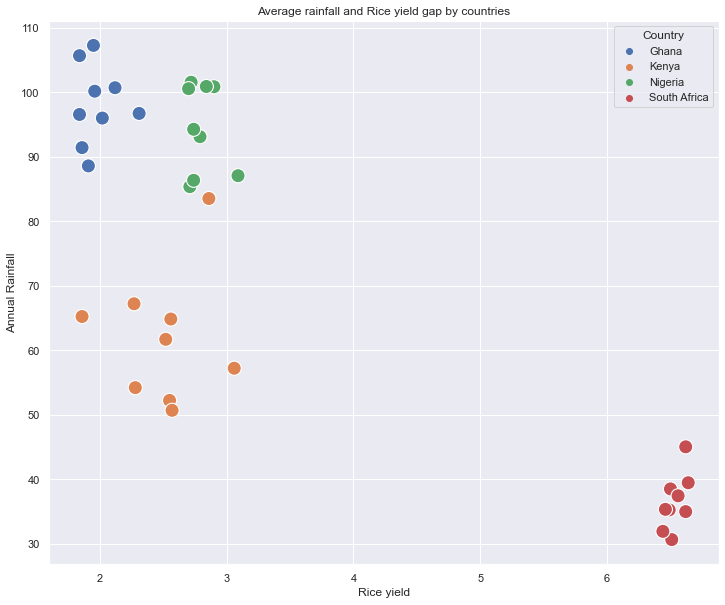

In [27]:
sns.scatterplot(x="rice_yield_gap", y="Rainfall", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Rice yield')
plt.ylabel ('Annual Rainfall')
plt.title('Average rainfall and Rice yield gap by countries')
plt.show()



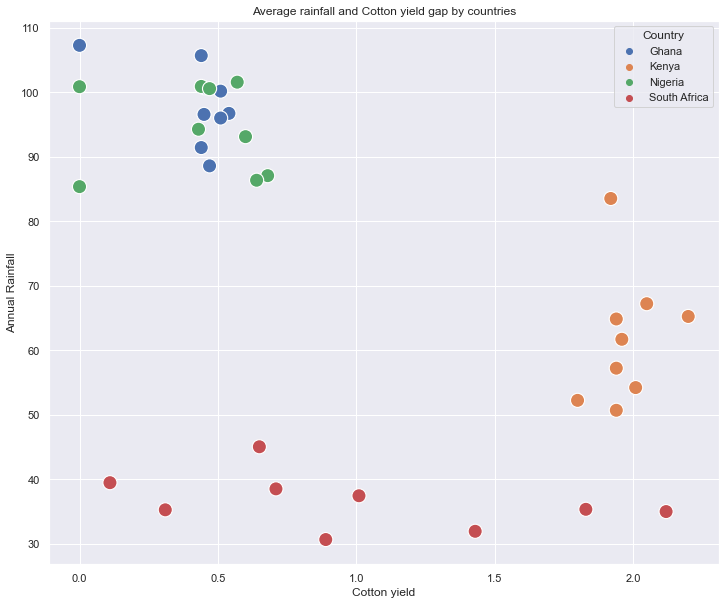

In [28]:
sns.scatterplot(x="cotton_yield_gap", y="Rainfall", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Cotton yield')
plt.ylabel ('Annual Rainfall')
plt.title('Average rainfall and Cotton yield gap by countries')
plt.show()



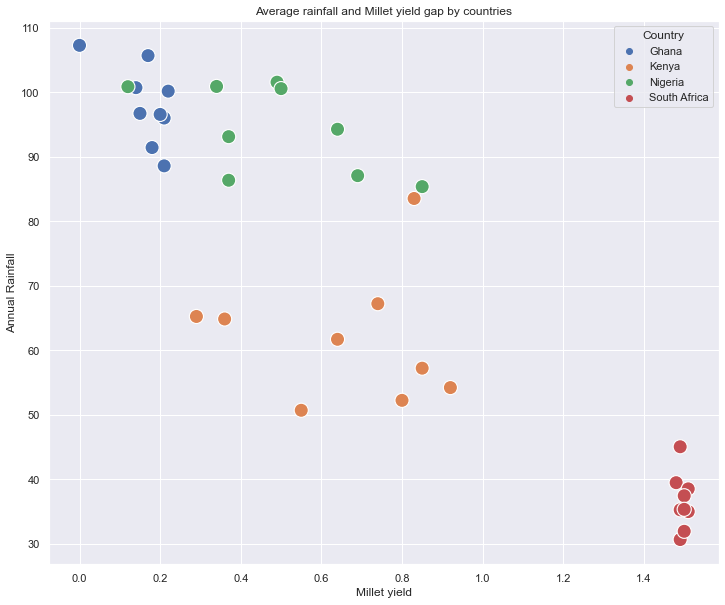

In [29]:
sns.scatterplot(x="millet_yield_gap", y="Rainfall", hue="Country", data=croptemp_rain,s=200)
plt.xlabel('Millet yield')
plt.ylabel ('Annual Rainfall')
plt.title('Average rainfall and Millet yield gap by countries')
plt.show()


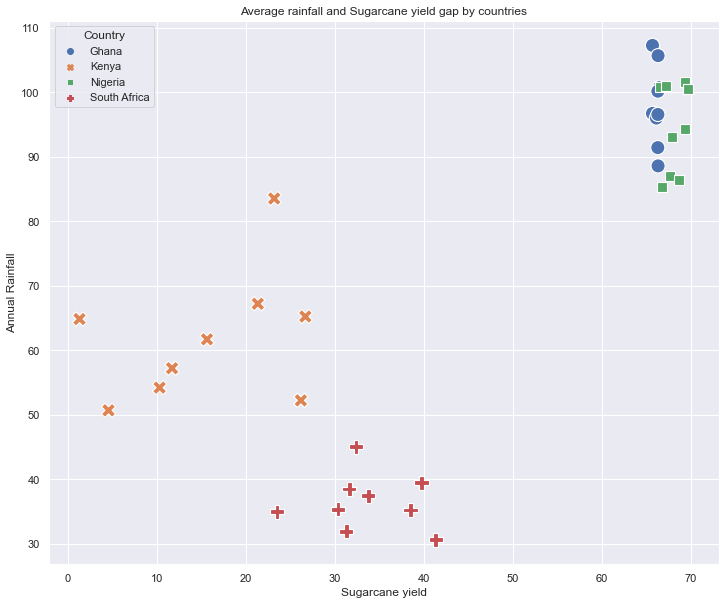

In [30]:
sns.scatterplot(x="sugarcane_yield_gap", y="Rainfall", hue="Country", data=croptemp_rain,s=200,style ="Country" )
plt.xlabel('Sugarcane yield')
plt.ylabel ('Annual Rainfall')
plt.title('Average rainfall and Sugarcane yield gap by countries')
plt.show()




# CORRELATION 
To measure if the temperature and rainfall affect crop yield or production, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [31]:
cropYield_gap  = crop_yieldTempRainPca[crops]
Temperature = crop_yieldTempRainPca[temperature]
(correlation, pValue) = spearmanr(cropYield_gap, Temperature)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.9271463585621841
It is  statistically significant.


In [32]:
cropYield_gap  = crop_yieldTempRainPca[crops]
Rainfall = crop_yieldTempRainPca[rainfall]
(correlation, pValue) = spearmanr(cropYield_gap, Rainfall)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.9240669240669243
It is  statistically significant.


# CONCLUSION

Based on our findings Climate change to a very large extent affects the production of crops thereby increasing the yield gap of crops annually
